# Unidad 1 Optimización sin restricciones
**Galicia Pineda Enrique**
## Actividad 1

**Instrucciones**. Resuelva cada uno de los siguientes problemas usando la técnica especificada.
Para cada uno de ellos se deberá presentar:

- El vector gradiente y, en caso de aplicar, la matriz Hessiana de la función

- Tabla con las 10 primeras iteraciones. La tabla debe presentar los valores del punto $x^{(t)}$, $d^{(t)}$, $\|\nabla f(x^{(t)})\|$ y $x^{(t+1)}$.

- La gráfica de contorno del comportamiento del algoritmo en la función.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from collections.abc import Callable
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import numpy as np

# utils functions
def compute_gradient_hessian(fun : Callable, vars : list):
    """
    Compute gradient and Hessian of a symbolic function.
    Args:
      - fun: Sympy symbolic function
      - vars: List of Sympy symbolic variables
    Returns:
      - Tuple: Gradient and Hessian of the function
    """
    # Compute gradient
    gradient = [sp.diff(fun, var) for var in vars]
    # Compute Hessian
    hess = sp.Matrix([[sp.diff(g, var) for var in vars] for g in gradient])

    return gradient, hess

def create_hist_df(hist : list):
  """
  This function takes the list of records and passes to
  pandas.DataFrame for readability
  Args:
    - hist: List of iteration record
  Returns:
    - hist_df: Pandas.DataFrame with iteration record
  """
  # Check number of columns
  if len(hist[0]) == 3:
    # Just the first 10 and initial seed
    hist_df = pd.DataFrame(hist,
                           columns = ['Iteración', 'x', 'Norma del gradiente'])
  # Include column for Hessian
  elif len(hist[0]) == 4:
    # Just the first 10 and initial seed
    hist_df = pd.DataFrame(hist,
                           columns = ['Iteración', 'x', 'Norma del gradiente',
                                      'Hessiana'])
  return hist_df

def plot_level_set_path(x_lims : tuple,
                        y_lims : tuple,
                        mesh_size : int,
                        f : Callable,
                        hist : list):
  """
  This function plots the level set
  of the function f and the optimization
  path computed by the algorithm and
  stored at hist
  Args:
    - x_lims: Tuple(float) Limits of x axis
    - y_lims: Tuple(float) Limits of y axis
    - mesh_size: int Mesh (square) to create an x,y grid
    - f: Callable Function to plot
    - hist: List of iteration record
  Returns:
    - None
  """
  # create mesh according to x,y limits
  # and mesh step
  x_axis = np.linspace(x_lims[0], x_lims[1], mesh_size)
  y_axis = np.linspace(y_lims[0], y_lims[1], mesh_size)
  x_mesh, y_mesh = np.meshgrid(x_axis, y_axis)
  # create an zeros numpy array to save f(x)
  f_x = np.zeros((mesh_size, mesh_size))
  for i in range(mesh_size):
    for j in range(mesh_size):
      # compute f(x) for every cell in the mesh
      f_x[i, j] = f(x_mesh[i, j], y_mesh[i, j])
  # check max, min obtained in the mesh
  f_x_min = np.min(f_x)
  f_x_max = np.max(f_x)
  # use as limits in level set
  levels = np.arange(1.1 * f_x_min, 1.1 * f_x_max, 1)
  # plot level set
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111)
  line_colors = ['black' for l in levels]
  cp = ax.contour(x_mesh, y_mesh, f_x, levels=levels, colors=line_colors)
  # naming level set
  ax.clabel(cp, fontsize=8, colors=line_colors)
  # plot optimization path
  points = np.array([t[1] for t in hist])
  ax.plot(points[:, 0], points[:, 1], 'r-*')

def plot_3d_fun_path(x_lims : tuple,
                     y_lims : tuple,
                     mesh_size : int,
                     f : Callable,
                     hist : list):
  """
  This function show a 3D plot
  of the function f and the optimization
  path computed by the algorithm and
  stored at hist
  Args:
    - x_lims: Tuple(float) Limits of x axis
    - y_lims: Tuple(float) Limits of y axis
    - mesh_size: int Mesh (square) to create an x,y grid
    - f: Callable Function to plot
    - hist: List of iteration record
  Returns:
    - None
  """
  x_axis = np.linspace(x_lims[0], x_lims[1], mesh_size)
  y_axis = np.linspace(y_lims[0], y_lims[1], mesh_size)

  x_mesh, y_mesh = np.meshgrid(x_axis, y_axis)
  f_x = np.zeros((mesh_size, mesh_size))
  for i in range(mesh_size):
    for j in range(mesh_size):
      # compute f(x) for every cell in the mesh
      f_x[i, j] = f(x_mesh[i, j], y_mesh[i, j])
  # Crear la figura y el eje 3D
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x_mesh,
                  y_mesh,
                  f_x,
                  cmap='viridis',
                  edgecolor='none',
                  alpha=0.7)
  points = np.array([t[1] for t in hist])
  x_line = points[:, 0]
  y_line = points[:, 1]
  z_line = f(x_line, y_line)
  ax.scatter(x_line, y_line, z_line, color='red', marker='o', s=50)


## 1. Resuelva cada uno de los siguientes ejercicios usando el método del descenso empinado (35 puntos)

In [ ]:
def gradient_descent(grad : Callable,
                     x0 : tuple,
                     step : float = 0.1,
                     tol : float = 1e-6,
                     max_iter : int = 100,
                     return_history : bool = True):
  # Initialize variables
  iter_number = 0
  # Cast x0 to numpy array
  x = np.array(x0, dtype = float)
  # Compute gradient and cast to numpy array
  grad_x = np.array(grad(*x))
  # Compute gradient norm
  norm_grad_x = np.dot(grad_x, grad_x)
  # Create array to save iterations record
  if return_history:
    # Save 0 iteration
    hist = [(iter_number, x.copy(), norm_grad_x)]
  # Stop criterion
  stop = (norm_grad_x < tol) or (iter_number > max_iter)

  while not stop:
    # Increase iter_number
    iter_number += 1
    # Update position
    x -= (step * grad_x)
    # Compute gradient on new position
    grad_x = np.array(grad(*x))
    # Compute gradient norm
    norm_grad_x = np.dot(grad_x, grad_x)
    # Save new values iteration, x, and grandient norm on hist
    if return_history:
      hist.append((iter_number, x.copy(), norm_grad_x))
    # Check stop contidion
    stop = (norm_grad_x < tol) or (iter_number > max_iter)
  # Returns solution (and history)
  return x if not return_history else (x, hist)


a) Considere el siguiente problema de optimización:

$$
\text{min: } \frac{3}{2}x^{2}_1+x^{2}_2-x_1x_2-\frac{19}{4}x_1+2x_2
$$

Para el descenso empinado, considere un tamaño de paso de $1/3$ y el punto de inicio $x^{(0)}=(-1,1)^T$

---

Calculando el gradiente de la función objetivo con `compute_gradient_hessian`:

In [ ]:
# create sympy symbols for variables
sym_x1, sym_x2 = sp.symbols('x y')
# just the vector x = (x1, x2)
sym_x = [sym_x1, sym_x2]
# create the symbolic function
sym_f = ((3 / 2) * sym_x1 ** 2 + sym_x2 ** 2 - sym_x1 * sym_x2
         -(19 / 4) * sym_x1 + 2 * sym_x2)
# compute symbolic gradient
sym_gradient, _ = compute_gradient_hessian(sym_f, sym_x)
sym_gradient

[3.0*x - y - 4.75, -x + 2*y + 2]

Es decir: $\nabla f(x_1, x_2) = (3x_1-x_2-\frac{19}{4}, -x_1 + 2x_2 + 2)$

Luego, pasamos de funciones en sympy (simbólicas) a una función con numpy y podemos aplicar nuestro algoritmo del decenso del gradiente con los parámetros especificados

In [ ]:
# Take symbolic function and transform to numpy funcion
f = sp.lambdify(sym_x, sym_f, 'numpy')
grad_f = sp.lambdify(sym_x, sym_gradient, 'numpy')
# Compute solutions via gradient descent
x_sol, hist = gradient_descent(grad_f, (-1, 1), 1 / 3)
# Create hist dataframe
hist_df = create_hist_df(hist)
# Show results
print(f"Solución encotrada: x_1 = {x_sol[0]}, x_2 = {x_sol[1]}")
print("Tabla con primeras 10 iteraciones:")
hist_df.head(11)

Solución encotrada: x_1 = 1.499724804823113, x_2 = -0.25044454605497124
Tabla con primeras 10 iteraciones:


,Iteración,x,Norma del gradiente
0,0,"[-1.0, 1.0]",1.015625e+02
1,1,"[1.9166666666666665, -0.6666666666666665]",4.340278e+00
2,2,"[1.3611111111111112, -0.25]",1.929012e-01
3,3,"[1.4999999999999998, -0.2962962962962963]",1.071674e-02
4,4,"[1.4845679012345678, -0.2654320987654321]",1.190748e-03
5,5,"[1.4948559670781894, -0.26028806584362146]",2.646107e-04
6,6,"[1.496570644718793, -0.25514403292181065]",7.350299e-05
7,7,"[1.4982853223593966, -0.2528577960676725]",2.123420e-05
8,8,"[1.499047401310776, -0.2515241579027586]",6.170621e-06
9,9,"[1.499491947365747, -0.25082558553066087]",1.794723e-06


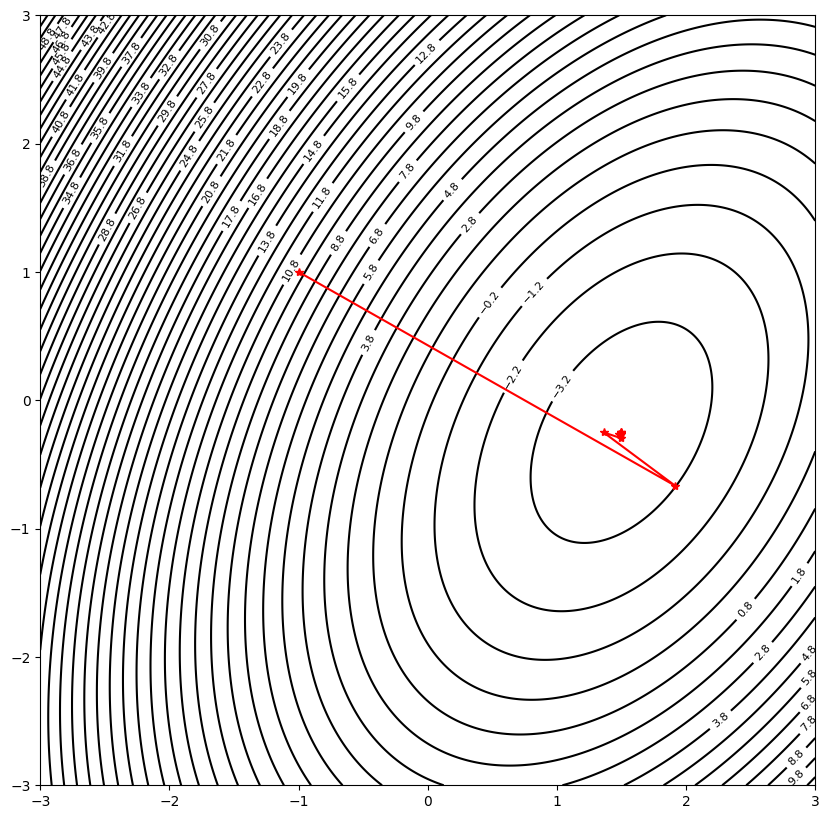

In [ ]:
plot_level_set_path((-3, 3), (-3, 3), 500, f, hist)

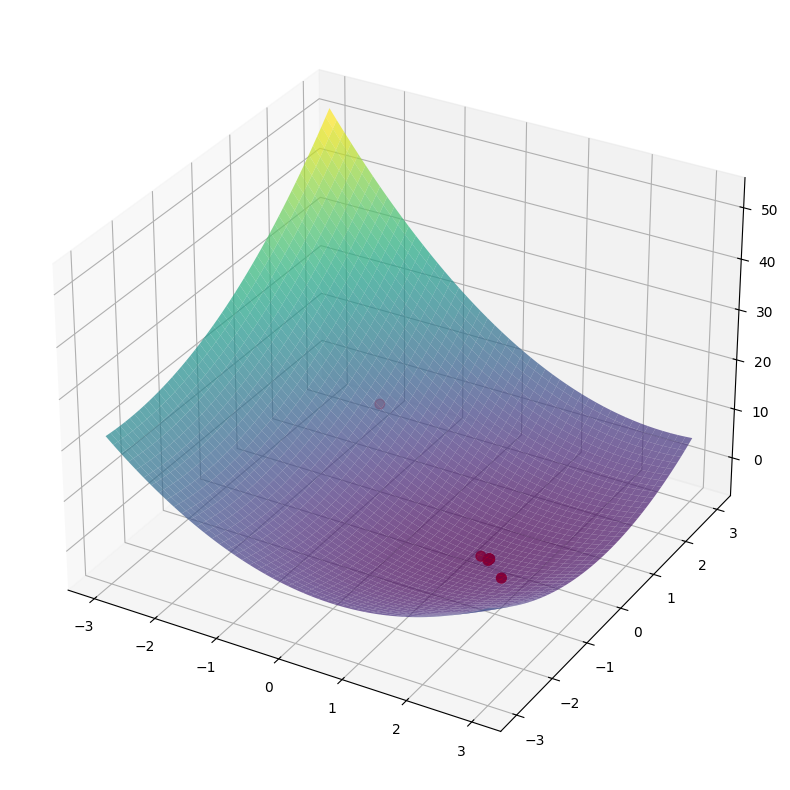

In [ ]:
plot_3d_fun_path((-3, 3), (-3, 3), 500, f, hist)

b) Considere el siguiente problema de optimización:

$$
\text{min: }\frac{10}{8}x_1^2+\frac{17}{32}x_2^2+\frac{11}{8}x_1x_2+\frac{1}{8}x_1+\frac{3}{8}x_2
$$

Para el descenso empinado, considere un tamaño de paso de $2/7$ y el punto de inicio $x^{(0)}=(1,0)^T$

---

Calculando el gradiente de la función objetivo con `compute_gradient_hessian`:

In [ ]:
# create the symbolic function
sym_f = ((10 / 8) * sym_x1 ** 2 + (17 / 32) * sym_x2 ** 2 +
         (11 / 8) * sym_x1 * sym_x2 + (1 / 8) * sym_x1 + (3 / 8) * sym_x2)
# compute symbolic gradient
sym_gradient, _ = compute_gradient_hessian(sym_f, sym_x)
sym_gradient

[2.5*x + 1.375*y + 0.125, 1.375*x + 1.0625*y + 0.375]

Es decir: $\nabla f(x_1, x_2) = (\frac{20}{8}x_1+ \frac{11}{8}x_2 + \frac{1}{8}, \frac{11}{8}x_1 + \frac{34}{32}x_2 + \frac{3}{8})$

Luego, pasamos de funciones en sympy (simbólicas) a una función con numpy y podemos aplicar nuestro algoritmo del decenso del gradiente con los parámetros especificados

In [ ]:
# Take symbolic function and transform to numpy funcion
f = sp.lambdify(sym_x, sym_f, 'numpy')
grad_f = sp.lambdify(sym_x, sym_gradient, 'numpy')
# Compute solutions via gradient descent
x_sol, hist = gradient_descent(grad_f, (1, 0), 2 / 7)
# Create hist dataframe
hist_df = create_hist_df(hist)
# Show results
print(f"Solución encotrada: x_1 = {x_sol[0]}, x_2 = {x_sol[1]}")
print("Tabla con primeras 10 iteraciones:")
hist_df.head(11)

Solución encotrada: x_1 = 0.4978246484928289, x_2 = -0.9964082590142749
Tabla con primeras 10 iteraciones:


,Iteración,x,Norma del gradiente
0,0,"[1.0, 0.0]",9.953125
1,1,"[0.25, -0.5]",0.039062
2,2,"[0.23214285714285715, -0.5535714285714286]",0.014356
3,3,"[0.24808673469387754, -0.5838647959183674]",0.012488
4,4,"[0.2645430940233236, -0.6112256286443148]",0.010902
5,5,"[0.27999380954550185, -0.6367454926007392]",0.009518
6,6,"[0.2944339605347195, -0.6605881789541048]",0.008310
7,7,"[0.30792648759903246, -0.6828658234102485]",0.007255
8,8,"[0.3205334270823212, -0.703681247146043]",0.006334
9,9,"[0.33231289768803723, -0.7231304291876204]",0.005529


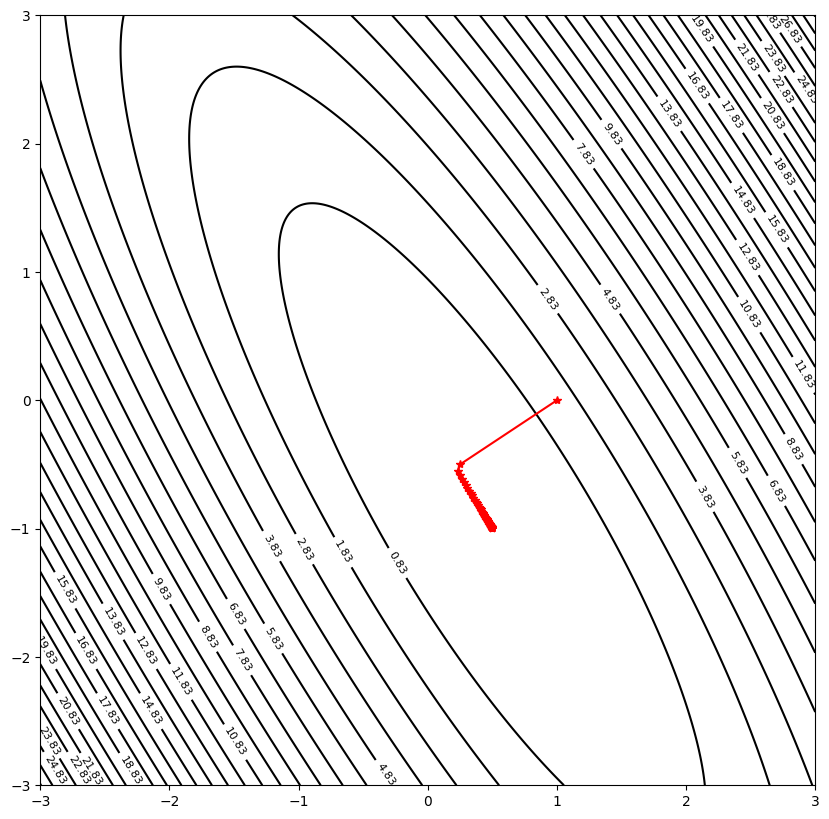

In [ ]:
plot_level_set_path((-3, 3), (-3, 3), 500, f, hist)

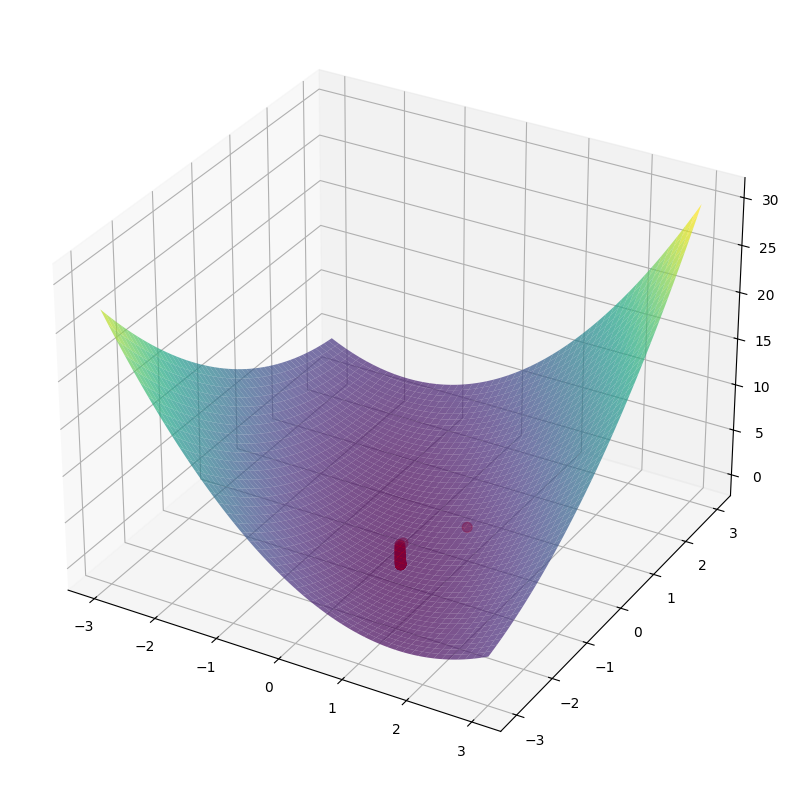

In [ ]:
plot_3d_fun_path((-3, 3), (-3, 3), 500, f, hist)

c) Considere el siguiente problema de optimización:

$$
\text{min: }x^2_1+x^2_2+x_1x_2-\frac{3}{4}(x_1+x_2)
$$

Para el descenso empinado, considere un tamaño de paso de $1/5$ y el punto de inicio en $x^{(0)}=(0,0)^T$

---

Calculando el gradiente de la función objetivo con `compute_gradient_hessian`:

In [ ]:
# create the symbolic function
sym_f = (sym_x1 ** 2 + sym_x2 ** 2
         + sym_x1 * sym_x2 - (3 / 4) * (sym_x1 + sym_x2))
# compute symbolic gradient
sym_gradient, _ = compute_gradient_hessian(sym_f, sym_x)
sym_gradient

[2*x + y - 0.75, x + 2*y - 0.75]

Es decir: $\nabla f(x_1, x_2) = (2x_1+x_2-\frac{3}{4}, x_1 + 2x_2 - \frac{3}{4})$

Luego, pasamos de funciones en sympy (simbólicas) a una función con numpy y podemos aplicar nuestro algoritmo del decenso del gradiente con los parámetros especificados

In [ ]:
# Take symbolic function and transform to numpy funcion
f = sp.lambdify(sym_x, sym_f, 'numpy')
grad_f = sp.lambdify(sym_x, sym_gradient, 'numpy')
# Compute solutions via gradient descent
x_sol, hist = gradient_descent(grad_f, (0, 0), 1 / 5)
# Create hist dataframe
hist_df = create_hist_df(hist)
# Show results
print(f"Solución encotrada: x_1 = {x_sol[0]}, x_2 = {x_sol[1]}")
print("Tabla con primeras 10 iteraciones:")
hist_df.head(11)

Solución encotrada: x_1 = 0.24983616, x_2 = 0.24983616
Tabla con primeras 10 iteraciones:


,Iteración,x,Norma del gradiente
0,0,"[0.0, 0.0]",1.125000e+00
1,1,"[0.15000000000000002, 0.15000000000000002]",1.800000e-01
2,2,"[0.21000000000000002, 0.21000000000000002]",2.880000e-02
3,3,"[0.23399999999999999, 0.23399999999999999]",4.608000e-03
4,4,"[0.24359999999999998, 0.24359999999999998]",7.372800e-04
5,5,"[0.24744, 0.24744]",1.179648e-04
6,6,"[0.248976, 0.248976]",1.887437e-05
7,7,"[0.2495904, 0.2495904]",3.019899e-06
8,8,"[0.24983616, 0.24983616]",4.831838e-07


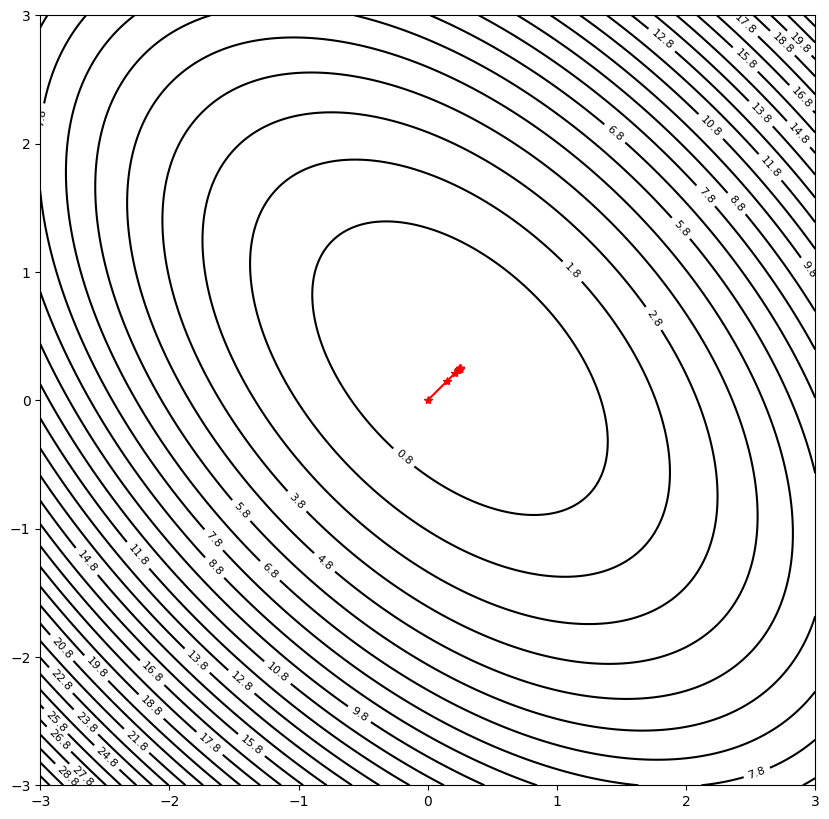

In [ ]:
plot_level_set_path((-3, 3), (-3, 3), 500, f, hist)

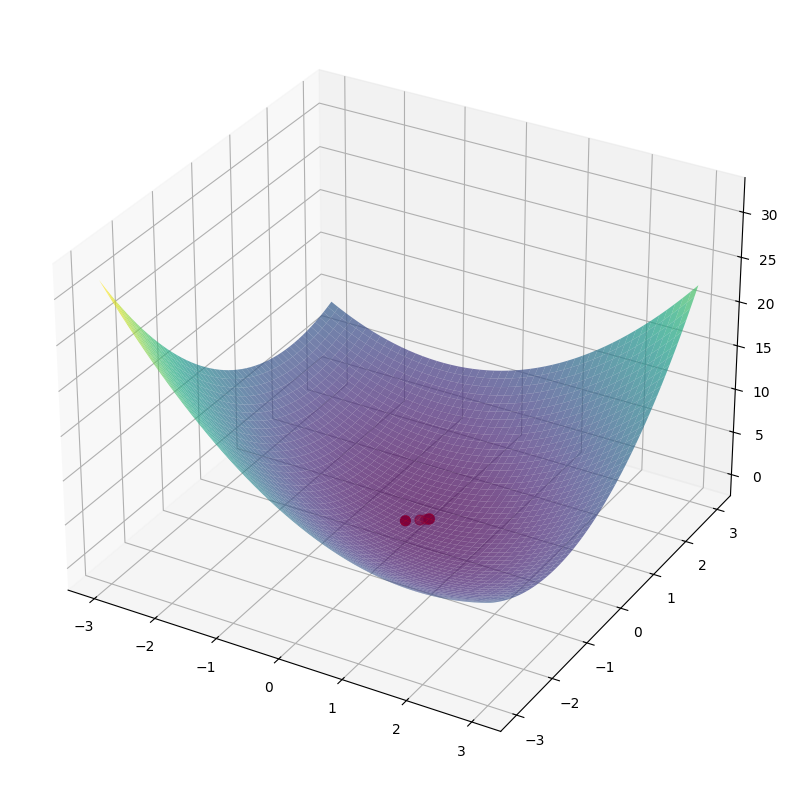

In [ ]:
plot_3d_fun_path((-3, 3), (-3, 3), 500, f, hist)

## 2. Usando el método de Newton, aproxime la solución del siguiente problema de optimización:

$$
\text{min: }\frac{1}{6}(x^{3}_1-2x^3_2)-\frac{3}{2}x_1x_2-2x_1+\frac{5}{2}x_2
$$

Considere un tamaño de paso de 1 y el punto de inicio $x^{(0)}=(0,0)^T$. Reporte la matriz Hessiana en cada iteración (30 puntos)

In [ ]:
def newton(grad : Callable,
           hess : Callable,
           x0 : tuple,
           step : float = 1.0,
           tol : float = 1e-6,
           max_iter : int = 100,
           return_history : bool = True):
  # Initialize variables
  iter_number = 0
  # Cast x0 to numpy array
  x = np.array(x0, dtype = float)
  # Compute gradient and cast to numpy array
  grad_x = np.array(grad(*x))
  # Compute hessian and cast to numpy array
  hess_x = np.array(hess(*x))
  # Compute gradient norm
  norm_grad_x = np.dot(grad_x, grad_x)
  # Create array to save iterations record
  if return_history:
    # Save 0 iteration
    hist = [(iter_number, x.copy(), norm_grad_x, hess_x)]
  # Stop criterion
  stop = (norm_grad_x < tol) or (iter_number > max_iter)

  while not stop:
    # Increase iter_number
    iter_number += 1
    # Compute inverse matrix
    inv_hess = np.linalg.inv(hess_x)
    # Update position
    x -= (step * (inv_hess @ grad_x))
    # Compute gradient on new position
    grad_x = np.array(grad(*x))
    # Compute hessian on new position
    hess_x = np.array(hess(*x))
    # Compute gradient norm
    norm_grad_x = np.dot(grad_x, grad_x)
    # Save new values iteration, x, grandient norm and hessian
    if return_history:
      hist.append((iter_number, x.copy(), norm_grad_x, hess_x))
    # Check stop contidion
    stop = (norm_grad_x < tol) or (iter_number > max_iter)
  # Returns solution (and history)
  return x if not return_history else (x, hist)

Calculando el gradiente de la función objetivo y la Hessiana con `compute_gradient_hessian`:

In [ ]:
# create the symbolic function
sym_f = ((1 / 6) * (sym_x1 ** 3 - 2 * sym_x2 ** 3)
         - (3 / 2) * sym_x1 * sym_x2 - 2 * sym_x1 + (5 / 2) * sym_x2)
# compute symbolic gradient
sym_gradient, sym_hess = compute_gradient_hessian(sym_f, sym_x)
sym_gradient

[0.5*x**2 - 1.5*y - 2, -1.5*x - 1.0*y**2 + 2.5]

In [ ]:
sym_hess

Matrix([
[1.0*x,   -1.5],
[ -1.5, -2.0*y]])

Es decir: $\nabla f(x_1, x_2) = (\frac{1}{2}x_1^2-\frac{3}{2}x_2 - 2, -\frac{3}{2}x_1 - x_2^2 + \frac{5}{2})$

Y
$$
H_f(x_1, x_2)=\begin{pmatrix}x_1 & -\frac{3}{2}\\
-\frac{3}{2} & -2x_2
\end{pmatrix}
$$

Luego, pasamos de funciones en sympy (simbólicas) a una función con numpy y podemos aplicar nuestro método de Newton con los parámetros especificados

In [ ]:
# Take symbolic function and transform to numpy funcion
f = sp.lambdify(sym_x, sym_f, 'numpy')
grad_f = sp.lambdify(sym_x, sym_gradient, 'numpy')
hess_f = sp.lambdify(sym_x, sym_hess, 'numpy')
# Compute solutions via gradient descent
x_sol, hist = newton(grad_f, hess_f, (0, 0), 1)
# Create hist dataframe
hist_df = create_hist_df(hist)
# Show results
print(f"Solución encotrada: x_1 = {x_sol[0]}, x_2 = {x_sol[1]}")
print("Tabla con primeras 10 iteraciones:")
hist_df.head(11)

Solución encotrada: x_1 = 1.000006915595442, x_2 = -1.0000038204503048
Tabla con primeras 10 iteraciones:


,Iteración,x,Norma del gradiente,Hessiana
0,0,"[0.0, 0.0]",1.025000e+01,"[[0.0, -1.5], [-1.5, -0.0]]"
1,1,"[1.6666666666666665, -1.3333333333333333]",5.089506e+00,"[[1.6666666666666665, -1.5], [-1.5, 2.66666666..."
2,2,"[1.19409282700422, -0.932489451476793]",3.828535e-02,"[[1.19409282700422, -1.5], [-1.5, 1.8649789029..."
3,3,"[-0.22785217641483158, -1.990003659483812]",2.272724e+00,"[[-0.22785217641483158, -1.5], [-1.5, 3.980007..."
4,4,"[0.515336883541818, -1.4289192917668851]",1.753760e-01,"[[0.515336883541818, -1.5], [-1.5, 2.857838583..."
5,5,"[0.9231996168284067, -1.1046848255639632]",1.797014e-02,"[[0.9231996168284067, -1.5], [-1.5, 2.20936965..."
6,6,"[1.047180689424103, -0.9729279700197467]",3.604343e-04,"[[1.047180689424103, -1.5], [-1.5, 1.945855940..."
7,7,"[0.9949777417444498, -1.0042481470598532]",2.818877e-06,"[[0.9949777417444498, -1.5], [-1.5, 2.00849629..."
8,8,"[1.000006915595442, -1.0000038204503048]",4.844441e-10,"[[1.000006915595442, -1.5], [-1.5, 2.000007640..."


In [ ]:
print(hist_df.Hessiana)

0                          [[0.0, -1.5], [-1.5, -0.0]]
1    [[1.6666666666666665, -1.5], [-1.5, 2.66666666...
2    [[1.19409282700422, -1.5], [-1.5, 1.8649789029...
3    [[-0.22785217641483158, -1.5], [-1.5, 3.980007...
4    [[0.515336883541818, -1.5], [-1.5, 2.857838583...
5    [[0.9231996168284067, -1.5], [-1.5, 2.20936965...
6    [[1.047180689424103, -1.5], [-1.5, 1.945855940...
7    [[0.9949777417444498, -1.5], [-1.5, 2.00849629...
8    [[1.000006915595442, -1.5], [-1.5, 2.000007640...
Name: Hessiana, dtype: object


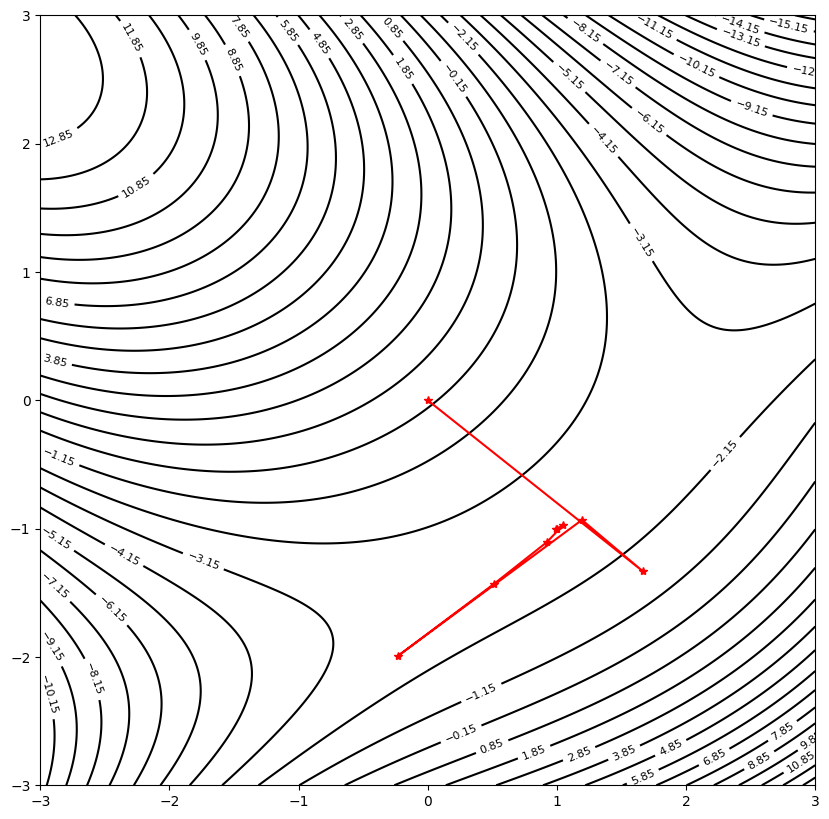

In [ ]:
plot_level_set_path((-3, 3), (-3, 3), 500, f, hist)

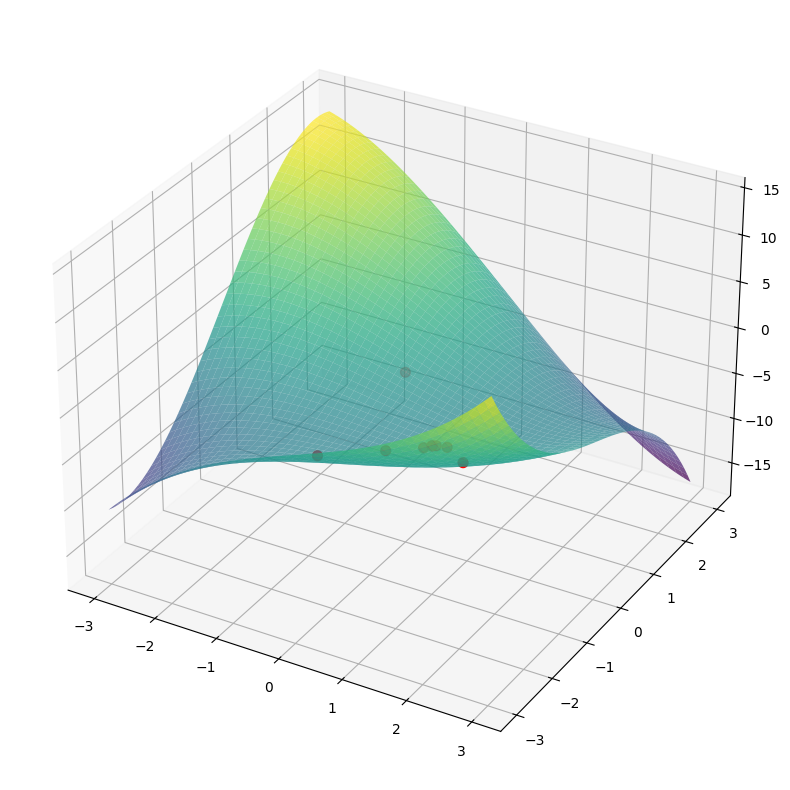

In [ ]:
plot_3d_fun_path((-3, 3), (-3, 3), 500, f, hist)

## 3.  Usando el método de cuasi-Newton BFGS, aproxime la solución del siguiente problema de optimización

$$
\text{min: }-\frac{1}{3}(x^3_1+x^3_2)+\frac{1}{2}x_1x_2+\frac{17}{72}x_1+\frac{11}{48}x_2
$$

Considere un tamaño de paso de 1 y el punto de inicio $x^{(0)}=(0,0)^{T}$. Reporte la aproximación de la matriz Hessiana en cada iteración (35 puntos).

In [ ]:
def bfgs(grad : Callable,
         x0 : tuple,
         step : float = 1.0,
         tol : float = 1e-6,
         max_iter :  int = 1000,
         return_history = True):
  # Initialize variables
  iter_number = 0
  # Cast x0 to numpy array
  x = np.array(x0, dtype = float)
  # Compute gradient and cast to numpy array
  grad_x = np.array(grad(*x))
  # Compute gradient norm
  norm_grad_x = np.linalg.norm(grad_x)
  # Initialize Hessian matriz approximation using Id matrix
  hess_x = np.eye(x.shape[0])
  # Create Id matrix needed in BFGS algorithm
  identity_n = np.eye(x.shape[0])
  if return_history:
    # Save 0 iteration
    hist = [(iter_number, x.copy(), norm_grad_x, hess_x)]
  # Stop criterion
  stop = (np.dot(grad_x, grad_x) < tol) or (iter_number > max_iter)

  while not stop:
    # Incrementar el contador de iteraciones.
    iter_number += 1
    # Calcular el desplazamiento del punto x.
    s = -(step * (hess_x @ grad_x))
    # Update x.
    x += s
    # Save gradient at t-1 and compute gradient on t.
    grad_x_t_1 = grad_x
    grad_x = np.array(grad(*x))
    # Compute gradient difference
    y = grad_x - grad_x_t_1
    # Compute denominator
    rho = 1 / np.dot(y[None, :], s[:, None])
    # Update Hessian matrix approx using BFGS formula.
    hess_x = (identity_n - rho * np.dot(s[:, None], y[None, :])) @ hess_x @ \
      (identity_n - rho * np.dot(y[:, None], s[None, :])) + \
      rho * np.dot(s[:,None], s[None, :])
    # Save new values iteration, x, grandient norm and hessian
    if return_history:
      hist.append((iter_number, x.copy(), norm_grad_x, hess_x))
    # Check stop contidion
    stop = (np.dot(grad_x, grad_x) < tol) or (iter_number > max_iter)
  # Returns solution (and history)
  return x if not return_history else (x, hist)

Calculando el gradiente de la función objetivo con `compute_gradient_hessian`:

In [ ]:
# create the symbolic function
sym_f = ((-1 / 3) * (sym_x1 ** 3 + sym_x2 ** 3)
         + (1 / 2) * sym_x1 * sym_x2 + (17 / 72) * sym_x1 + (11 / 48) * sym_x2)
# compute symbolic gradient
sym_gradient, _ = compute_gradient_hessian(sym_f, sym_x)
sym_gradient

[-1.0*x**2 + 0.5*y + 0.236111111111111, 0.5*x - 1.0*y**2 + 0.229166666666667]

Es decir: $\nabla f(x_1, x_2) = (-x_1^2+\frac{1}{2}x_2 + \frac{17}{72}, \frac{1}{2}x_1 - x_2^2 + \frac{11}{48})$

Luego, pasamos de funciones en sympy (simbólicas) a una función con numpy y podemos aplicar nuestro método de Newton con los parámetros especificados

In [ ]:
# Take symbolic function and transform to numpy funcion
f = sp.lambdify(sym_x, sym_f, 'numpy')
grad_f = sp.lambdify(sym_x, sym_gradient, 'numpy')
# Compute solutions via gradient descent
x_sol, hist = bfgs(grad_f, (0, 0), 1)
# Create hist dataframe
hist_df = create_hist_df(hist)
# Show results
print(f"Solución encotrada: x_1 = {x_sol[0]}, x_2 = {x_sol[1]}")
print("Tabla con primeras 10 iteraciones:")
hist_df.head(11)

Solución encotrada: x_1 = -0.3333001614559784, x_2 = -0.25076117206980597
Tabla con primeras 10 iteraciones:


,Iteración,x,Norma del gradiente,Hessiana
0,0,"[0.0, 0.0]",0.329038,"[[1.0, 0.0], [0.0, 1.0]]"
1,1,"[-0.236111111111111, -0.229166666666667]",0.329038,"[[1.2037759354196675, 0.18214967376243396], [0..."
2,2,"[-0.3259675072113125, -0.3092119775317062]",0.329038,"[[1.018449119172249, -0.026615793175790325], [..."
3,3,"[-0.30154448349934193, -0.28230317767703395]",0.329038,"[[0.9028496469853344, -0.0554994780329533], [-..."
4,4,"[-0.30525555682632194, -0.28076137021044273]",0.329038,"[[4.420961612278705, -2.872457731321778], [-2...."
5,5,"[-0.32309902243591465, -0.2671531816048986]",0.329038,"[[5.60912221425023, -4.695079343360514], [-4.6..."
6,6,"[-0.33029846879807945, -0.257726807632232]",0.329038,"[[5.371450941553132, -5.377076597487202], [-5...."
7,7,"[-0.3333001614559784, -0.25076117206980597]",0.329038,"[[5.274792979379487, -5.323549875635564], [-5...."


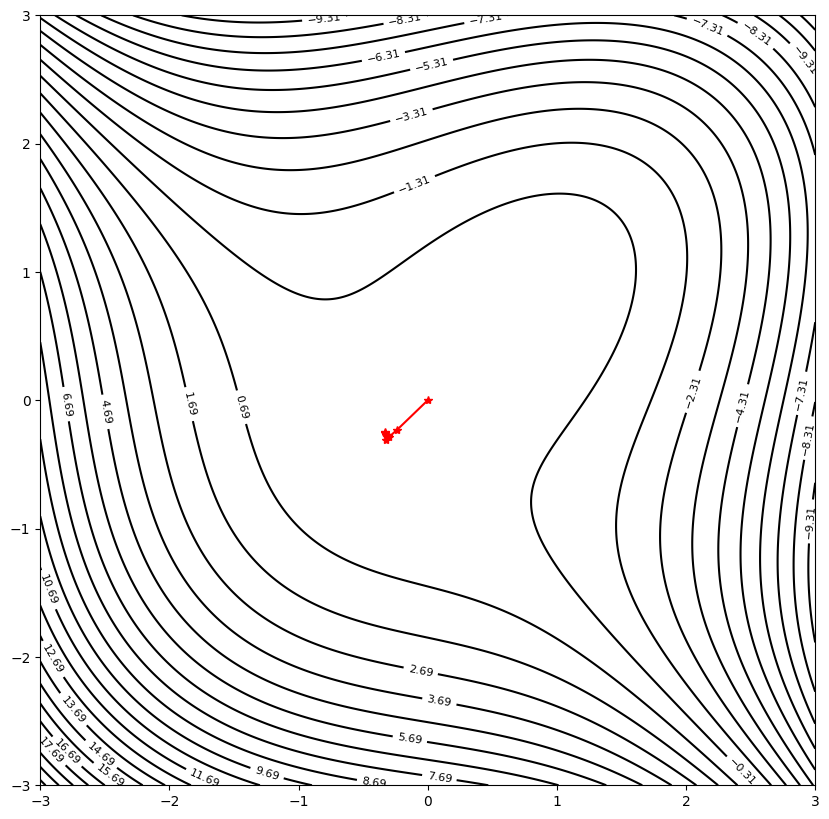

In [ ]:
plot_level_set_path((-3, 3), (-3, 3), 500, f, hist)

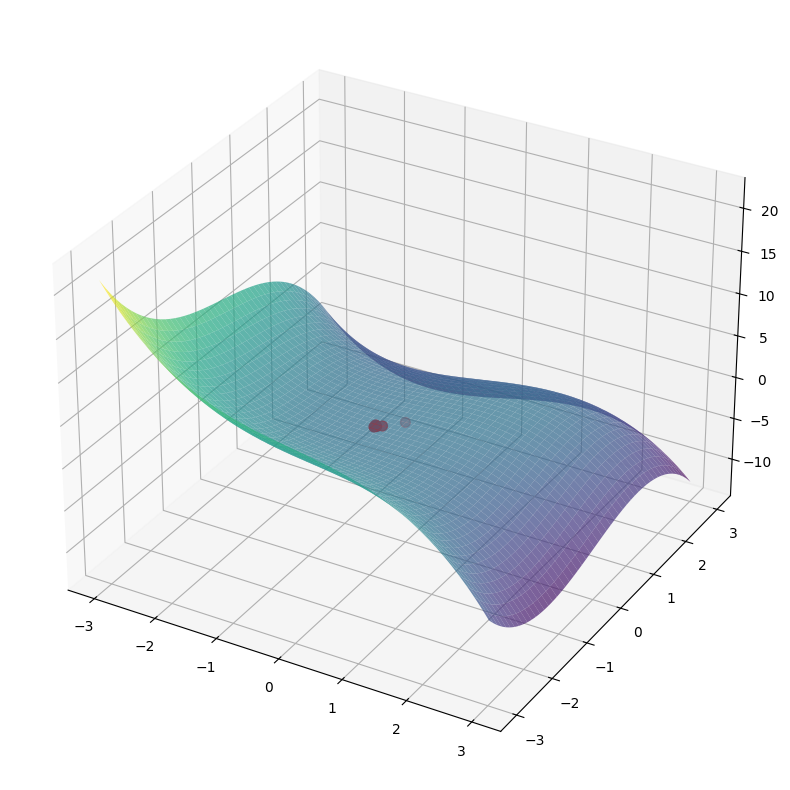

In [ ]:
plot_3d_fun_path((-3, 3), (-3, 3), 500, f, hist)